<h1 style="text-align: center;
           border-radius: 15px;
           padding: 20px;
           margin: 0;
           font-size: 220%;
           font-family: Arial, sans-serif;
           background-color: #184D4C;
           color: #F5F5F5;
           box-shadow: 0 6px 12px rgba(0, 0, 0, 0.2);
           border: 2px solid #EDEBEC;">   
<b>Análise de Vendas de uma Cafeteria ☕</b>
</h1>

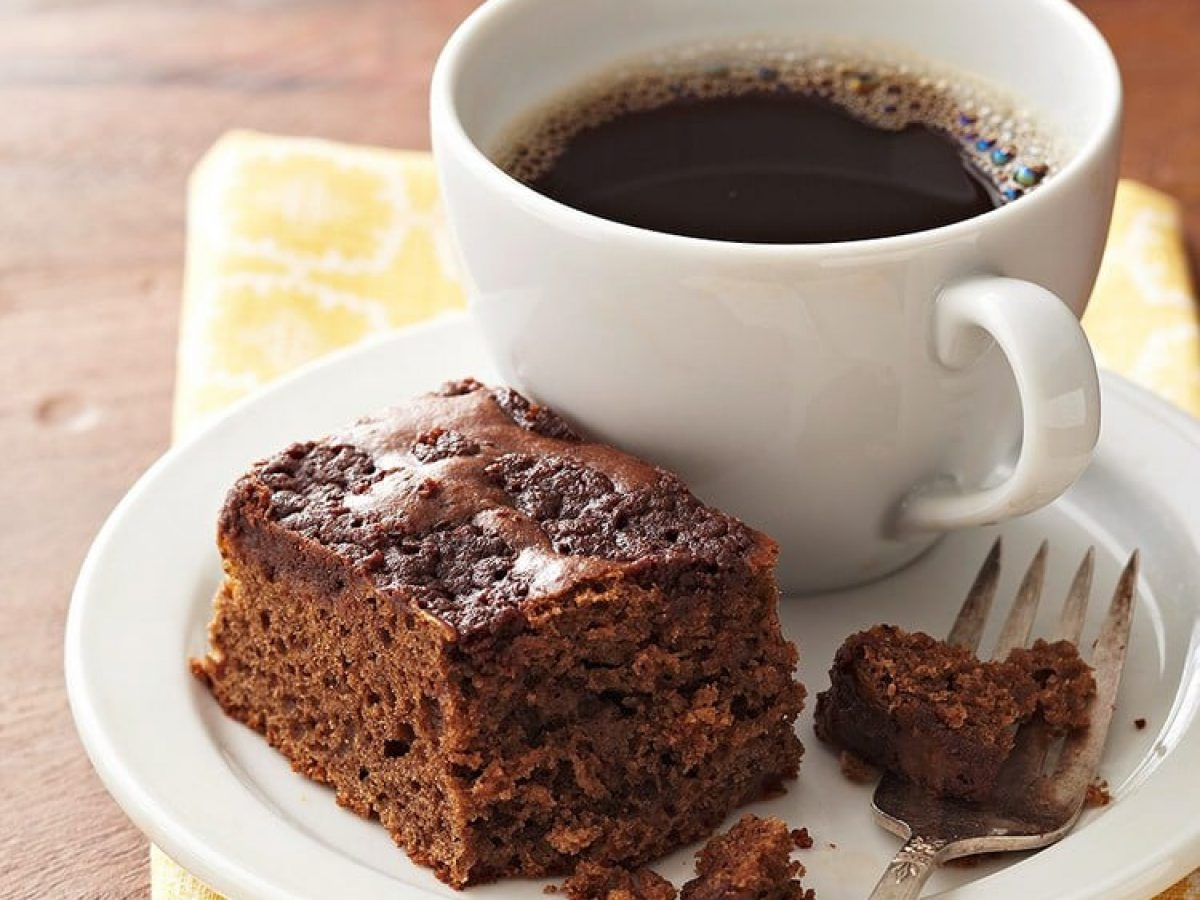

# 1. Introdução:

# 📊 Sobre o projeto

Este projeto tem como objetivo realizar uma análise e limpeza detalhada dos dados de vendas de uma cafeteria fictícia ao longo do ano de 2023. Os dados foram obtidos de uma base pública disponível no [Kaggle](https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training) e traduzido para o português.

**🛠️ Metodologia**
* **Coleta de Dados** – Os dados foram obtidos de uma base pública no Kaggle, contendo registros detalhados de vendas da cafeteria em 2023.
* **Limpeza e Tratamento de Dados** – Foram aplicadas técnicas para remoção e imputação de valores nulos e padronização de formatos para garantir a consistência dos dados.
* **Análise Exploratória (EDA)** – A análise dos dados foi realizada com foco em métricas-chave, como volume de vendas, ticket médio e sazonalidade.
* **Visualização de Dados** – Gráficos e tabelas foram utilizados para facilitar a interpretação dos resultados.

**🎯 Objetivo**

Durante o processo de análise, o objetivo é responder as seguintes questões:

* Qual o método de pagamento mais utilizado?
* Qual o ticket médio das compras?
* Qual o faturamento total e médio por mês?
* Quais são os 3 itens mais vendidos?
* Quais produtos representam maior receita?
* Existem produtos que vendem muito pouco e podem ser descontinuados?
* Existe uma sazonalidade clara nas vendas?



# 2. Importando bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(context = 'notebook', palette = 'tab10', style = 'white', rc = custom_params)

# 3. Carregando e  averiguando os dados

In [2]:
df = pd.read_csv('vendas_cafe.csv')
df.head(10)

,ID Transacao,Item,Quantidade,Preco Unitario,Gasto Total,Metodo Pagamento,Localidade,Data Transacao
0,TXN_1961373,Cafe,2,2.0,4.0,Cartao de Credito,Entrega,2023-09-08
1,TXN_4977031,Bolo,4,3.0,12.0,Dinheiro,Loja,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERRO,Cartao de Credito,Loja,2023-07-19
3,TXN_7034554,Salada,2,5.0,10.0,Nao Sabemos,Nao Sabemos,2023-04-27
4,TXN_3160411,Cafe,2,2.0,4.0,Carteira Digital,Loja,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Cartao de Credito,NaN,2023-03-31
6,TXN_4433211,Nao Sabemos,3,3.0,9.0,ERRO,Entrega,2023-10-06
7,TXN_6699534,Sanduiche,4,4.0,16.0,Dinheiro,Nao Sabemos,2023-10-28
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Entrega,2023-07-28
9,TXN_2064365,Sanduiche,5,4.0,20.0,NaN,Loja,2023-12-31


In [3]:
df.shape

(10000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID Transacao      10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantidade        9862 non-null   object
 3   Preco Unitario    9821 non-null   object
 4   Gasto Total       9827 non-null   object
 5   Metodo Pagamento  7421 non-null   object
 6   Localidade        6735 non-null   object
 7   Data Transacao    9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [5]:
df.isnull().sum()

,0
ID Transacao,0
Item,333
Quantidade,138
Preco Unitario,179
Gasto Total,173
Metodo Pagamento,2579
Localidade,3265
Data Transacao,159


In [6]:
df.duplicated().sum()

0

In [7]:
colunas = list(df.columns)

for col in colunas[1:7]:
    print(f'Os valores únicos da coluna {col} são: \n {df[col].unique()}\n')

Os valores únicos da coluna Item são: 
 ['Cafe' 'Bolo' 'Cookie' 'Salada' 'Smoothie' 'Nao Sabemos' 'Sanduiche' nan
 'ERRO' 'Suco' 'Cha']

Os valores únicos da coluna Quantidade são: 
 ['2' '4' '5' '3' '1' 'ERRO' 'Nao Sabemos' nan]

Os valores únicos da coluna Preco Unitario são: 
 ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERRO' 'Nao Sabemos']

Os valores únicos da coluna Gasto Total são: 
 ['4.0' '12.0' 'ERRO' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'Nao Sabemos' '2.0' '1.0' '7.5' '4.5' '1.5']

Os valores únicos da coluna Metodo Pagamento são: 
 ['Cartao de Credito' 'Dinheiro' 'Nao Sabemos' 'Carteira Digital' 'ERRO'
 nan]

Os valores únicos da coluna Localidade são: 
 ['Entrega' 'Loja' 'Nao Sabemos' nan 'ERRO']



A exploração inicial de dados nos revela o seguinte:



*   **🧮 Observações**: O dataset consiste de 10000 observações em 8 colunas.
*   **⚠️ Valores Faltantes**: Apenas a coluna `ID Transacao` não tem valor faltante, em contrapartida nas colunas `Metodo Pagamento` e `Localidade` há muitos valores faltantes.
*  **📊 Tipos de Coluna**: 3 colunas são numéricas e todas elas precisam ser convertidas para o `dtype float`, as outras 5 são categóricas. A coluna `Data Transacao` deve ser convertida para `datetime`.
*  **✅ Duplicatas**: Não há duplicatas no dataset.


# 4. Limpeza e tratamento dos dados

In [8]:
x = df['ID Transacao'].nunique()
print(f'Número de valores únicos na coluna ID Transacao: {x}')

Número de valores únicos na coluna ID Transacao: 10000


Como todos os valores da coluna `ID Transacao` são diferentes e não trazem nenhuma informação útil, ela será removida.

In [9]:
df.drop(['ID Transacao'], axis = 1, inplace = True)

## 🧹 Limpando a coluna `Data Transacao`

Transformando os valores para o formato `datetime`:

In [10]:
df['Data Transacao'] = pd.to_datetime(df['Data Transacao'], errors = 'coerce')

In [11]:
df['Data Transacao'].isnull().sum()

460

Como a quantidade de valores nulos na coluna `Data Transacao` é menor que 5% do total de linhas do nosso `DataFrame` e que o nosso objetivo é fazer uma análise em relação ao tempo, eu vou retirar essas linhas.

In [12]:
df = df.dropna(subset=['Data Transacao'])

In [13]:
df.reset_index(drop = True)

,Item,Quantidade,Preco Unitario,Gasto Total,Metodo Pagamento,Localidade,Data Transacao
0,Cafe,2,2.0,4.0,Cartao de Credito,Entrega,2023-09-08
1,Bolo,4,3.0,12.0,Dinheiro,Loja,2023-05-16
2,Cookie,4,1.0,ERRO,Cartao de Credito,Loja,2023-07-19
3,Salada,2,5.0,10.0,Nao Sabemos,Nao Sabemos,2023-04-27
4,Cafe,2,2.0,4.0,Carteira Digital,Loja,2023-06-11
...,...,...,...,...,...,...,...
9535,Cafe,2,2.0,4.0,NaN,Nao Sabemos,2023-08-30
9536,NaN,3,NaN,3.0,Carteira Digital,NaN,2023-06-02
9537,Cafe,4,2.0,8.0,Carteira Digital,NaN,2023-03-02
9538,Cookie,3,NaN,3.0,Carteira Digital,NaN,2023-12-02


🆕 Criando uma nova coluna chamada `Mes` para facilitar as análises mensais que faremos a posteriori.

In [14]:
df['Mes'] = df['Data Transacao'].dt.strftime('%B')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9540 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Item              9225 non-null   object        
 1   Quantidade        9405 non-null   object        
 2   Preco Unitario    9375 non-null   object        
 3   Gasto Total       9383 non-null   object        
 4   Metodo Pagamento  7101 non-null   object        
 5   Localidade        6422 non-null   object        
 6   Data Transacao    9540 non-null   datetime64[ns]
 7   Mes               9540 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 670.8+ KB


✅ `Data Transacao` limpa!


## 🧹 Limpando colunas numéricas (`Quantidade`, `Preco Unitario` e `Gasto Total`)

🔨 Construindo uma função para substituir os valores `ERRO`, `Nao Sabemos` e `NaN` por `0` e aplicá-la nas colunas `Quantidade`, `Preco Unitario` e `Gasto Total`:


In [16]:
def coluna_float(df, coluna):
    df[coluna] = (
        df[coluna]
        .replace(['ERRO', 'Nao Sabemos'], np.nan)  # Substitui "ERRO" e "Nao Sabemos" por NaN
        .astype(float)                             # Converte para float
        .fillna(0)                                 # Substitui NaN por 0
    )

In [17]:
for col in colunas[2:5]:
    coluna_float(df, col)

⏭️ O próximo passo será calcular, quando possível, os valores que acabaram de ser substituídos por zero. Para isso, deve-se perceber que a seguinte igualdade é verdadeira:

\begin{equation}
\text{Gasto Total} = \text{Quantidade} \times \text{Preco Unitario}
\end{equation}



In [18]:
df.loc[df['Gasto Total'] == 0, 'Gasto Total'] = (df['Quantidade'] * df['Preco Unitario'])

In [19]:
df['Gasto Total'].value_counts()

,count
Gasto Total,
6.0,969
12.0,947
3.0,926
4.0,920
20.0,750
15.0,710
8.0,687
10.0,521
2.0,495


In [20]:
df.loc[(df['Quantidade'] == 0) & (df['Preco Unitario'] != 0), 'Quantidade'] = (
    df['Gasto Total'] / df['Preco Unitario']
    )

In [21]:
df['Quantidade'].value_counts()

,count
Quantidade,
5.0,2003
2.0,1966
3.0,1858
4.0,1841
1.0,1836
0.0,36


In [22]:
df.loc[(df['Preco Unitario'] == 0) & (df['Quantidade'] != 0), 'Preco Unitario'] = (
    df['Gasto Total'] / df['Quantidade']
    )

In [23]:
df['Preco Unitario'].value_counts()

,count
Preco Unitario,
3.0,2435
4.0,2330
2.0,1244
5.0,1214
1.0,1146
1.5,1136
0.0,35


🗑 Removendo as linhas em que pelo menos 2 valores são zero nas colunas `Quantidade`, `Preco Unitario` e `Gasto Total`:

In [24]:
df.drop(
    df.loc[(df['Quantidade'] == 0) | (df['Preco Unitario'] == 0) | (df['Gasto Total'] == 0),
        ['Quantidade','Preco Unitario', 'Gasto Total']
        ].index,
    inplace = True
            )

df.reset_index(drop = True)

,Item,Quantidade,Preco Unitario,Gasto Total,Metodo Pagamento,Localidade,Data Transacao,Mes
0,Cafe,2.0,2.0,4.0,Cartao de Credito,Entrega,2023-09-08,September
1,Bolo,4.0,3.0,12.0,Dinheiro,Loja,2023-05-16,May
2,Cookie,4.0,1.0,4.0,Cartao de Credito,Loja,2023-07-19,July
3,Salada,2.0,5.0,10.0,Nao Sabemos,Nao Sabemos,2023-04-27,April
4,Cafe,2.0,2.0,4.0,Carteira Digital,Loja,2023-06-11,June
...,...,...,...,...,...,...,...,...
9480,Cafe,2.0,2.0,4.0,NaN,Nao Sabemos,2023-08-30,August
9481,NaN,3.0,1.0,3.0,Carteira Digital,NaN,2023-06-02,June
9482,Cafe,4.0,2.0,8.0,Carteira Digital,NaN,2023-03-02,March
9483,Cookie,3.0,1.0,3.0,Carteira Digital,NaN,2023-12-02,December


In [25]:
df['Quantidade'] = df['Quantidade'].astype(int)

✅ `Preco Unitario`, `Quantidade` e `Gasto Total` limpas!

## 🧹 Limpeza da coluna `Item`.

In [26]:
df['Item'].value_counts()

,count
Item,
Suco,1120
Cafe,1116
Salada,1095
Bolo,1077
Sanduiche,1066
Smoothie,1042
Cookie,1028
Cha,1020
Nao Sabemos,327


📋 Listando quais são os itens válidos:

In [27]:
itens_validos = list(df.loc[~df['Item'].isin([np.nan, 'ERRO', 'Nao Sabemos']), 'Item'].unique())
print(itens_validos)

['Cafe', 'Bolo', 'Cookie', 'Salada', 'Smoothie', 'Sanduiche', 'Suco', 'Cha']


 🧮 Atribuindo o preço de cada item válido de acordo com a moda e criando uma lista dos preços:

In [28]:
preco_item_val = []

for item in itens_validos:
    moda = df.loc[df['Item'] == item, 'Preco Unitario'].mode()
    if not moda.empty:
        preco_item_val.append(moda[0])
        print(f'O preço do {item} é igual a R$ {moda[0]}')

O preço do Cafe é igual a R$ 2.0
O preço do Bolo é igual a R$ 3.0
O preço do Cookie é igual a R$ 1.0
O preço do Salada é igual a R$ 5.0
O preço do Smoothie é igual a R$ 4.0
O preço do Sanduiche é igual a R$ 4.0
O preço do Suco é igual a R$ 3.0
O preço do Cha é igual a R$ 1.5


📖 Criando um dicionário com os itens válidos como chaves e seus preços correspondentes como os valores:

In [29]:
dici_preco_val = dict(zip(itens_validos, preco_item_val))
print(dici_preco_val)

{'Cafe': 2.0, 'Bolo': 3.0, 'Cookie': 1.0, 'Salada': 5.0, 'Smoothie': 4.0, 'Sanduiche': 4.0, 'Suco': 3.0, 'Cha': 1.5}


🔍 Veja que Bolo e Suco custam 3.0 e Smoothie e Sanduiche custam 4.0, vou trocar esses itens do dicionário por 'Bolo ou Suco' : 3.0 e 'Smoothie ou Sanduiche' : 4.0.

In [30]:
from collections import defaultdict

# Criar um dicionário para agrupar chaves pelo mesmo valor
valores_iguais = defaultdict(list)

for chave, valor in dici_preco_val.items():
    valores_iguais[valor].append(chave)

# Criar novo dicionário agrupado
dici_agrupado = {
    " ou ".join(chaves): valor for valor, chaves in valores_iguais.items()
}

print(dici_agrupado)

{'Cafe': 2.0, 'Bolo ou Suco': 3.0, 'Cookie': 1.0, 'Salada': 5.0, 'Smoothie ou Sanduiche': 4.0, 'Cha': 1.5}


Com o dicionário agrupado, vamos substituir os valores na coluna `Item`, mas só aqueles que são `NaN`, `ERRO` ou `Nao Sabemos`.

In [31]:
filtro = df['Item'].isin([np.nan, 'ERRO', 'Nao Sabemos'])

for chave, valor in dici_agrupado.items():
    df.loc[filtro & (df['Preco Unitario'] == valor), 'Item'] = chave

In [32]:
df['Item'].unique()

array(['Cafe', 'Bolo', 'Cookie', 'Salada', 'Smoothie', 'Bolo ou Suco',
       'Sanduiche', 'Cha', 'Suco', 'Smoothie ou Sanduiche'], dtype=object)

In [33]:
df['Item'].value_counts()

,count
Item,
Cafe,1239
Salada,1212
Cookie,1144
Cha,1135
Suco,1120
Bolo,1077
Sanduiche,1066
Smoothie,1042
Bolo ou Suco,234


### Tratamento os valores `Bolo ou Suco` e `Smoothie ou Sanduiche`

🧮 Calculando as quantidades de `Bolo` e `Suco` e armazenando-as em um `np.array`:

In [34]:
n_bolo = df['Item'].value_counts()['Bolo']
n_suco = df['Item'].value_counts()['Suco']

n_bs = np.array([n_bolo, n_suco])

🧮 Calculando as proporções de `Bolo` e `Suco` e armazendo-as em outro `np.array`:

In [35]:
prop_bs = n_bs / n_bs.sum()

🔁 De maneira análoga, calcularemos o vetor com as quantidades de `Smoothie` e `Sanduiche` e o vetor das suas respectivas proporções:

In [36]:
n_smoothie = df['Item'].value_counts()['Smoothie']
n_sanduiche = df['Item'].value_counts()['Sanduiche']

n_ss = np.array([n_smoothie, n_sanduiche])

prop_ss = n_ss / n_ss.sum()

Com essas informações, criaremos uma função que escolhe um `Item` de maneira aleatória e que busque manter as proporções existentes anteriormente:

In [37]:
def aleat_item(valor):

    if valor == 'Bolo ou Suco':
        return np.random.choice(['Bolo', 'Suco'], p = prop_bs)

    elif valor == 'Smoothie ou Sanduiche':
        return np.random.choice(['Smoothie', 'Sanduiche'], p = prop_ss)

    else:
        return valor

💉 Aplicando a função criada na coluna `Item`:

In [38]:
np.random.seed(42)

df['Item'] = df['Item'].apply(aleat_item)

📊 Checando o resultado:

In [39]:
df['Item'].unique()

array(['Cafe', 'Bolo', 'Cookie', 'Salada', 'Smoothie', 'Sanduiche',
       'Suco', 'Cha'], dtype=object)

In [40]:
df['Item'].value_counts()

,count
Item,
Suco,1242
Cafe,1239
Salada,1212
Bolo,1189
Sanduiche,1180
Cookie,1144
Smoothie,1144
Cha,1135


✅ `Item` limpa!

## 🧹 Limpando as colunas `Metodo Pagamento` e `Localidade`

📊 Checando os valores e suas respectivas quantidades na coluna `Metodo Pagamento`:

In [41]:
df['Metodo Pagamento'].value_counts()

,count
Metodo Pagamento,
Carteira Digital,2186
Cartao de Credito,2157
Dinheiro,2145
ERRO,292
Nao Sabemos,279


📋 Criaremos uma lista com os valores de pagamentos válidos:

In [42]:
pagamentos_validos = list(df.loc[~df['Metodo Pagamento'].isin([np.nan, 'ERRO', 'Nao Sabemos']), 'Metodo Pagamento'].unique())

♻️ Transformando os valores `Nao Sabemos` e `ERRO` em `NaN`:

In [43]:
df.loc[df['Metodo Pagamento'].isin(['Nao Sabemos', 'ERRO']), 'Metodo Pagamento'] = np.nan

Armazenando os índices dos valores `NaN` da coluna `Metodo Pagamento` e usando-os para substiuir os valores `NaN` por um valor de `pagamentos_validos` de maneira aleatória:

In [44]:
nan_indices_pag = df[df['Metodo Pagamento'].isna()].index
fill_pagamentos = []

np.random.seed(42)

for idx in nan_indices_pag:

    pag_escolhido = np.random.choice(pagamentos_validos)
    fill_pagamentos.append(pag_escolhido)

df.loc[nan_indices_pag, 'Metodo Pagamento'] = fill_pagamentos

⚠️ A escolha aleatória foi feita sem considerar as proporções de cada pagamento válido, pois todos valores de `pagamentos_validos` eram muito próximos uns dos outros.

📊 Checando o resultado:

In [45]:
df['Metodo Pagamento'].value_counts()

,count
Metodo Pagamento,
Cartao de Credito,3192
Dinheiro,3150
Carteira Digital,3143


🔁 A mesma ideia será aplicada à coluna `Localidades`:

In [46]:
df['Localidade'].value_counts()

,count
Localidade,
Entrega,2872
Loja,2853
ERRO,338
Nao Sabemos,320


⚠️ Como a quantidade de valores `Entrega` e `Loja` são muito próximos, não vamos utilizar a proporção entre eles para fazer a escolha aleatória.

In [47]:
localidades_validas = list(df.loc[~df['Localidade'].isin([np.nan, 'ERRO', 'Nao Sabemos']), 'Localidade'].unique())

df.loc[df['Localidade'].isin(['Nao Sabemos', 'ERRO']), 'Localidade'] = np.nan

nan_indices_loc = df[df['Localidade'].isna()].index
fill_localidade = []

np.random.seed(42)

for idx in nan_indices_loc:

    loc_escolhida = np.random.choice(localidades_validas)
    fill_localidade.append(loc_escolhida)


df.loc[nan_indices_loc, 'Localidade'] = fill_localidade

📊 Checando o resultado:

In [48]:
df['Localidade'].value_counts()

,count
Localidade,
Entrega,4755
Loja,4730


✅ `Metodo Pagamento` e `Localidade` limpas!

Durante a etapa de limpeza dos dados várias etapas importantes foram realizadas:

*  **✂️ Redução de feature**: Deletamos informações desnecessárias ou que não fossem possíveis de deduzir.
*   **📅 Nova feature**: Criamos uma nova feature que representa o mês da compra.
*  **✅ Tipo de dado corrigido**: Corrigimos o `dtype` de todas as features de acordo com a sua natureza.
* **📥 Imputação de dados**: Imputamos dados faltantes de acordo com a lógica entre as próprias features ou escolhendo de maneira aleatória, mas mantendo a proporção inicial.


# 5. Análise Exploratória dos Dados:


##  Qual o método de pagamento mais utilizado?



In [49]:
pagamento = df['Metodo Pagamento'].value_counts().sort_values(ascending = True)
pagamento

,count
Metodo Pagamento,
Carteira Digital,3143
Dinheiro,3150
Cartao de Credito,3192


In [50]:
metodo_mais_utilizado = pagamento.idxmax()

print(f'O método de pagamento mais utilizado é {metodo_mais_utilizado}.')

O método de pagamento mais utilizado é Cartao de Credito.


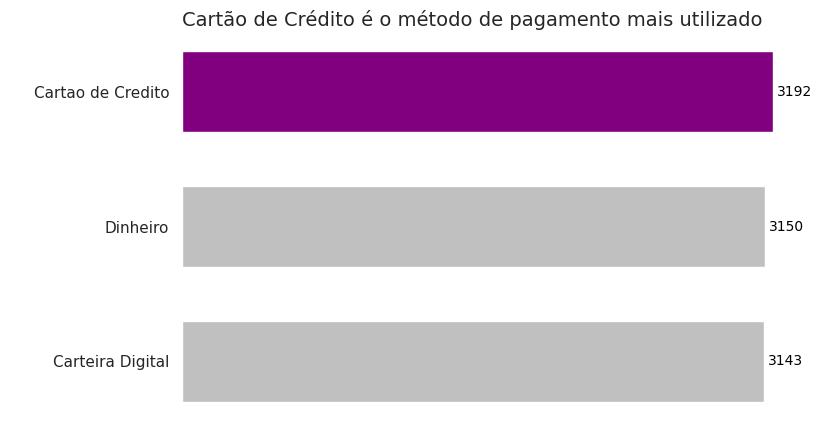

In [51]:
cores =[]
for paym in pagamento.index:
  if paym == metodo_mais_utilizado:
    cores.append('purple')
  else:
    cores.append('silver')

fig, ax = plt.subplots(figsize = (8,5))

ax.barh(pagamento.index, pagamento.values, color = cores, height=0.6)
plt.title('Cartão de Crédito é o método de pagamento mais utilizado', loc = 'left', fontsize = 14)

for i, v in enumerate(pagamento.values):
  ax.text(v + 20, i, str(v), color = 'black', fontsize = 10, ha = 'left', va = 'center')

ax.set_ylabel(' ')
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)

plt.show()

Apesar do Cartão de Crédito ser o método de pagamento mais utilizado, os outros métodos (Dinheiro e Carteira Digital) são praticamente tão utilizados quanto o Cartão de Crédito.

##  Qual o ticket médio das compras?

In [52]:
ticket_medio = round(df['Gasto Total'].mean(),2)

print(f'O ticket médio das compras é de R$ {ticket_medio}')

O ticket médio das compras é de R$ 8.92


## Qual o faturamento total e médio por mês?

In [53]:
faturamento_total = df['Gasto Total'].sum()
faturamento_mes = round(faturamento_total / 12, 2)

print(f'O faturamento total do ano de 2023 foi de R$ {faturamento_total} com uma média mensal de R$ {faturamento_mes}')

O faturamento total do ano de 2023 foi de R$ 84643.0 com uma média mensal de R$ 7053.58


## Quais são os 3 itens mais vendidos?

In [54]:
item_venda = df.groupby('Item')['Quantidade'].sum().sort_values(ascending = True)
item_venda

,Quantidade
Item,
Cookie,3416
Cha,3424
Smoothie,3519
Sanduiche,3583
Bolo,3611
Salada,3638
Suco,3714
Cafe,3759


In [55]:
top_3_vendas = list(item_venda.tail(3).index)

print(f'Os 3 itens mais vendidos são: \n 1º {top_3_vendas[-1]} \n 2º {top_3_vendas[-2]} \n 3º {top_3_vendas[-3]}')

Os 3 itens mais vendidos são: 
 1º Cafe 
 2º Suco 
 3º Salada


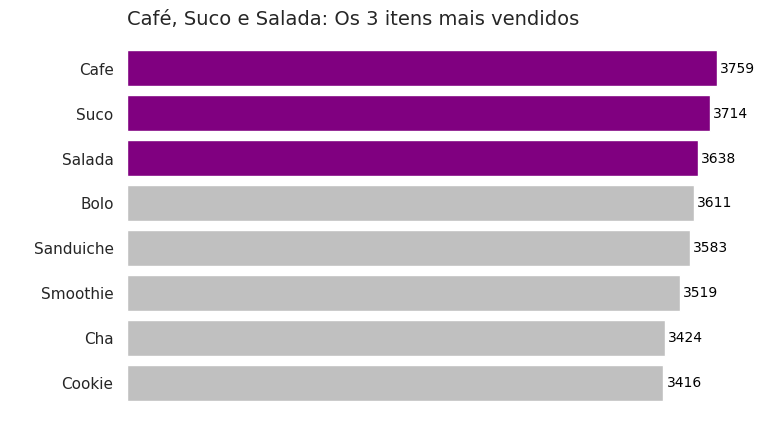

In [56]:
cores =[]
for item in item_venda.index:
  if item in top_3_vendas:
    cores.append('purple')
  else:
    cores.append('silver')

fig, ax = plt.subplots(figsize = (8,5))

ax.barh(item_venda.index, item_venda.values, color = cores)
plt.title('Café, Suco e Salada: Os 3 itens mais vendidos', loc = 'left', fontsize = 14)

for i, v in enumerate(item_venda.values):
  ax.text(v + 20, i, str(v), color = 'black', fontsize = 10, ha = 'left', va = 'center')

ax.set_ylabel(' ')
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)

plt.show()

## Quais produtos representam maior receita?

In [57]:
receita_produto = df.groupby('Item')['Gasto Total'].sum().sort_values(ascending = True)
receita_produto

,Gasto Total
Item,
Cookie,3416.0
Cha,5136.0
Cafe,7518.0
Bolo,10833.0
Suco,11142.0
Smoothie,14076.0
Sanduiche,14332.0
Salada,18190.0


In [58]:
top_3_receita = list(receita_produto.tail(3).index)
print(f'Os 3 itens mais geram receita são: \n 1º {top_3_receita[-1]} \n 2º {top_3_receita[-2]} \n 3º {top_3_receita[-3]}')

Os 3 itens mais geram receita são: 
 1º Salada 
 2º Sanduiche 
 3º Smoothie


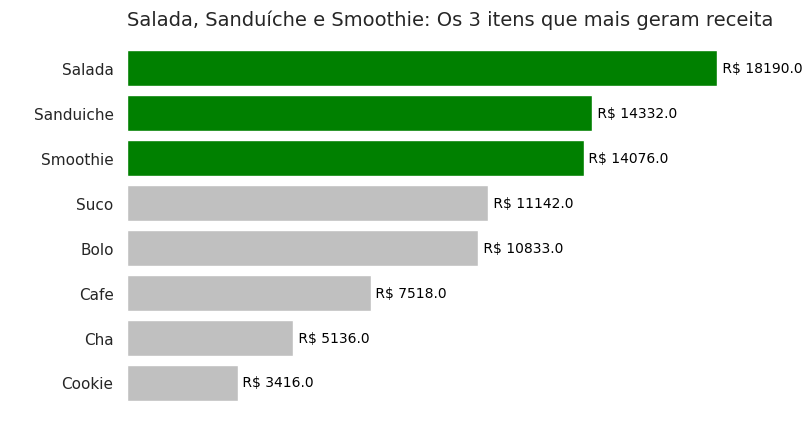

In [59]:
cores =[]
for item in receita_produto.index:
  if item in top_3_receita:
    cores.append('green')
  else:
    cores.append('silver')

fig, ax = plt.subplots(figsize = (8,5))

ax.barh(receita_produto.index, receita_produto.values, color = cores)
plt.title('Salada, Sanduíche e Smoothie: Os 3 itens que mais geram receita', loc = 'left', fontsize = 14)

for i, v in enumerate(receita_produto.values):
  ax.text(v + 20, i,' '+ 'R$' + ' ' + str(v), color = 'black', fontsize = 10, ha = 'left', va = 'center')

ax.set_ylabel(' ')
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)

plt.show()

## Existem produtos que vendem muito pouco e podem ser descontinuados?

In [60]:
item_venda = item_venda.to_frame()
receita_produto= receita_produto.to_frame()

In [61]:
fatur_por_produto = item_venda.merge(receita_produto, left_index= True, right_index=True)
fatur_por_produto.rename(columns = {'Gasto Total' : 'Faturamento Total'}, inplace = True)

fatur_por_produto['Porcentagem do Faturamento'] = (fatur_por_produto['Faturamento Total'] / fatur_por_produto['Faturamento Total'].sum()) * 100
fatur_por_produto['Porcentagem do Faturamento'] = fatur_por_produto['Porcentagem do Faturamento'].round(2)

fatur_por_produto

,Quantidade,Faturamento Total,Porcentagem do Faturamento
Item,,,
Cookie,3416,3416.0,4.04
Cha,3424,5136.0,6.07
Smoothie,3519,14076.0,16.63
Sanduiche,3583,14332.0,16.93
Bolo,3611,10833.0,12.80
Salada,3638,18190.0,21.49
Suco,3714,11142.0,13.16
Cafe,3759,7518.0,8.88


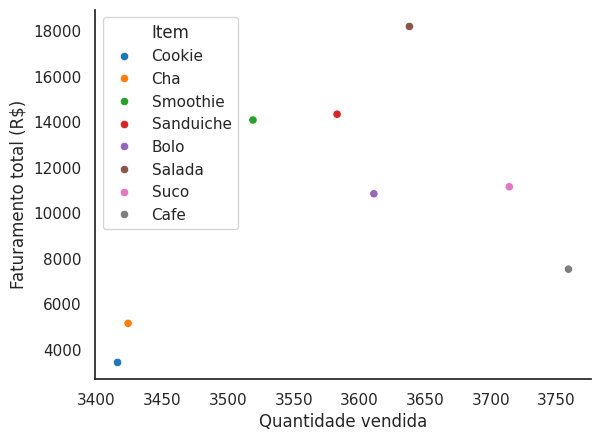

In [62]:
ax = sns.scatterplot(x = fatur_por_produto['Quantidade'],
                     y = fatur_por_produto['Faturamento Total'],
                     hue = fatur_por_produto.index
                     )

ax.set_ylabel('Faturamento total (R$)')
ax.set_xlabel('Quantidade vendida')
# sns.despine()
plt.show()

Do DataFrame `fatur_por_produto` e do scatterplot podemos tirar as seguintes conclusões:

* **⚠️ Itens de Pouca Receita**: Os Itens Chá e Cookie não só vendem menos, como também geram pouca receita em comparação aos demais itens. Apesar disso, eles não vendem pouco em valores absolutos. Já o Café é o item que mais vende, porém é o terceiro que menos gera receita.
* **🥇 Melhor Produto de 2023**: A Salada é o item que mais gera receita representando pouco mais de 20% do faturamento total do ano de 2023.

Logo, o produto candidato a ser descontinuado é o Cookie por representar apenas 4% do faturamento aproximadamente. Por outro lado, o Café é o produto cadidato a ter seu preço aumentado, já que é o produto mais vendido, porém representa menos de 10% do faturamento.


## Existe uma sazonalidade clara nas vendas?

In [63]:
faturamento_mensal = df.groupby('Mes')['Gasto Total'].sum()

meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
gasto_total_mensal = []

for mes in meses:
    gasto_total_mensal.append(faturamento_mensal[mes])

data_mensal = zip(meses, gasto_total_mensal)
df_mensal = pd.DataFrame(data = data_mensal, columns = ['Mes', 'Faturamento Mensal'])

meses_ptbr = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

df_mensal['Mes'] = meses_ptbr
df_mensal

,Mes,Faturamento Mensal
0,Janeiro,7219.0
1,Fevereiro,6626.0
2,Março,7190.5
3,Abril,7168.0
4,Maio,6916.5
5,Junho,7350.0
6,Julho,6876.5
7,Agosto,7049.5
8,Setembro,6842.0
9,Outubro,7295.0


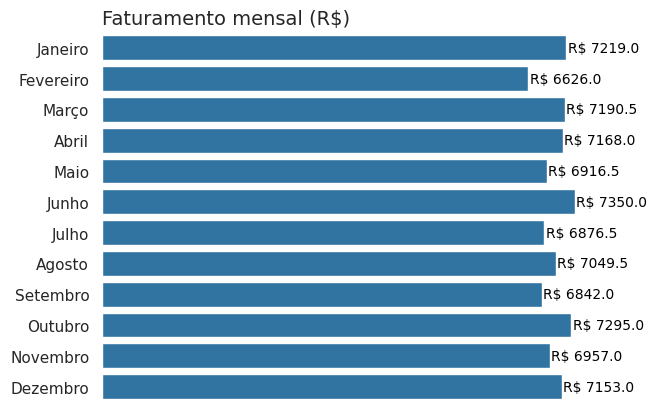

In [64]:
ax = sns.barplot(y = df_mensal['Mes'], x = df_mensal['Faturamento Mensal'], orient = 'h')

ax.set_title('Faturamento mensal (R$)', fontsize = 14, loc = 'left')
ax.set_ylabel('')

for i, v in enumerate(df_mensal['Faturamento Mensal']):
  ax.text(v + 20, i,'R$' + ' ' + str(v), color = 'black', fontsize = 10, ha = 'left', va = 'center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
sns.despine()
plt.show()

Pelo gráfico de barras podemos perceber que **não há sazonalidade** nas vendas. As diferenças de faturamento a cada mês podem ser explicadas simplesmente por conta da quantidade de dias de cada mês.

Por exemplo, fevereiro foi o mês que registrou o menor faturamento, porém se calcularmos o **faturamento médio diário de fevereiro de 2023**, obtemos:

\\
\begin{equation}
 \frac{\text{R\$ 6626,00}}{28} = \text{R\$ 236,64}
\end{equation}

\\
 Já o **faturamento médio diário de janeiro** do mesmo ano é igual a

 \\
 \begin{equation}
 \frac{\text{R\$ 7219,00}}{31} = \text{R\$ 232,87}
\end{equation}

 ou seja, *menor* que o de Fevereiro.

Obrigado por ler esse notebook! 👋